In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.colors import ListedColormap

In [3]:
def generateColors(n):
    li = []
    for i in range(n):
        r = lambda: random.randint(0,255)
        li.append('#%02X%02X%02X' % (r(),r(),r()))
    return li

In [3]:
# Load dataset
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
url = "iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=names)
#lets make it a binary problem, remove one of the classes
data = data[data['class'] != 'Iris-virginica']

X = data.iloc[:,2:4]#sepal length and width
y = data.iloc[:,-1]#class

### Les look at our data

In [4]:
X.head(5)

,petal-length,petal-width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [5]:
X.describe()

,petal-length,petal-width
count,100.000000,100.000000
mean,2.862000,0.785000
std,1.448565,0.566288
min,1.000000,0.100000
25%,1.500000,0.200000
50%,2.450000,0.800000
75%,4.325000,1.300000
max,5.100000,1.800000


### Lets plot the petal length vs petal width

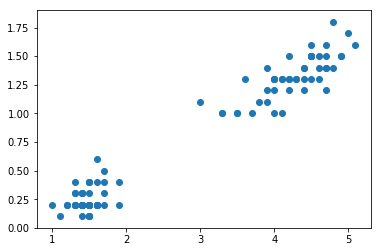

In [6]:
plt.scatter(X.iloc[:,0], X.iloc[:,1])

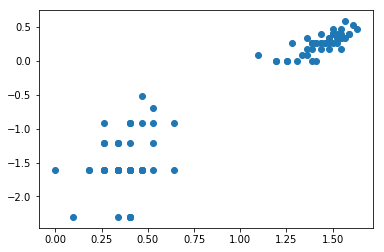

In [7]:
#lets log transform and see what it looks like
plt.scatter(np.log(X.iloc[:,0]), np.log(X.iloc[:,1]))

In [9]:
y.tail(5)

95    Iris-versicolor
96    Iris-versicolor
97    Iris-versicolor
98    Iris-versicolor
99    Iris-versicolor
Name: class, dtype: object

### Encode the labels

In [10]:
#Encode the y labels
print("Labels before Transforming")
print(y.head(5))
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
y_label_encoder = LabelEncoder()
y = y_label_encoder.fit_transform(y)
print("Labels after Transforming")
print(y[:5])

Labels before Transforming
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object
Labels after Transforming
[0 0 0 0 0]


In [13]:
y[-1:]

array([1])

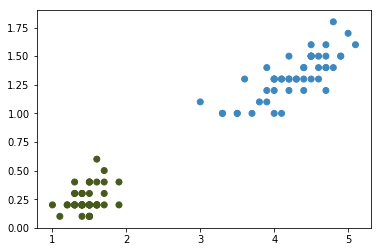

In [14]:
#lets quickly look at our data
plt.scatter(X['petal-length'], X['petal-width'], c=y, cmap = ListedColormap(generateColors(100)))#zero is purple

### Lets split the dataset into training and testing

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Lets do some feature scaling

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Lets see if it made a difference?

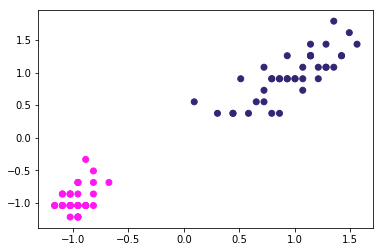

In [18]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap = ListedColormap(generateColors(100)))#zero is purple

Do you think it made a difference?

### Lets fit a logistic regression to the data and see if we can classify

In [20]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
# Predicting the Test set results
y_hat = classifier.predict(X_test)

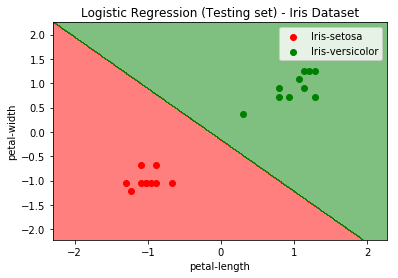

In [22]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = y_label_encoder.classes_[j])
plt.title('Logistic Regression (Testing set) - Iris Dataset')
plt.xlabel('petal-length')
plt.ylabel('petal-width')
plt.legend()
plt.show()

### Lets now try with KNN

In [25]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

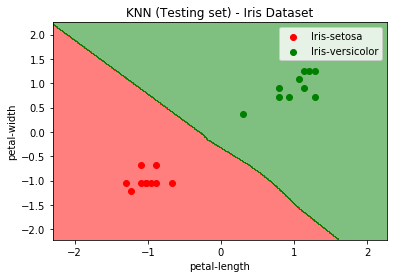

In [26]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = y_label_encoder.classes_[j])
plt.title('KNN (Testing set) - Iris Dataset')
plt.xlabel('petal-length')
plt.ylabel('petal-width')
plt.legend()
plt.show()

### Assignment: Try with decision tree and random forest

In [31]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=10)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

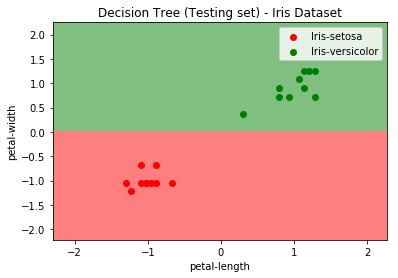

In [32]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = y_label_encoder.classes_[j])
plt.title('Decision Tree (Testing set) - Iris Dataset')
plt.xlabel('petal-length')
plt.ylabel('petal-width')
plt.legend()
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=1, n_estimators=2)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

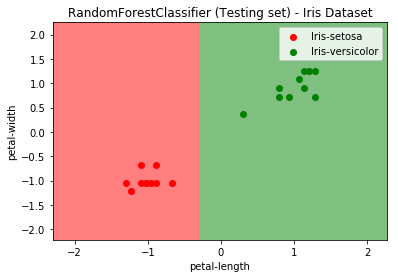

In [40]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = y_label_encoder.classes_[j])
plt.title('RandomForestClassifier (Testing set) - Iris Dataset')
plt.xlabel('petal-length')
plt.ylabel('petal-width')
plt.legend()
plt.show()

# Assignment: try classifying the 3 flower classes

In [4]:
# Load dataset
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
url = "iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=names)
#lets make it a binary problem, remove one of the classes

X = data.iloc[:,2:4]#sepal length and width
y = data.iloc[:,-1]#class

### Lets plot the petal length vs petal width

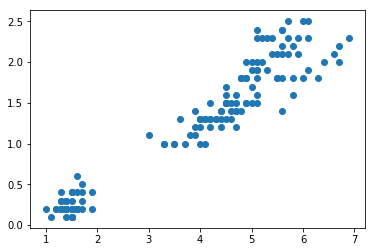

In [5]:
plt.scatter(X.iloc[:,0], X.iloc[:,1])

In [6]:
#Encode the y labels
print("Labels before Transforming")
print(y.head(5))
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
y_label_encoder = LabelEncoder()
y = y_label_encoder.fit_transform(y)
print("Labels after Transforming")
print(y[:5])

Labels before Transforming
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object
Labels after Transforming
[0 0 0 0 0]


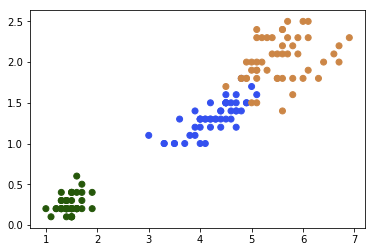

In [7]:
#lets quickly look at our data
plt.scatter(X['petal-length'], X['petal-width'], c=y, cmap = ListedColormap(generateColors(100)))#zero is purple

### Lets split the dataset into training and testing

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

### Lets do some feature scaling

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Before we predict we should look at our test data and see if we can classify them

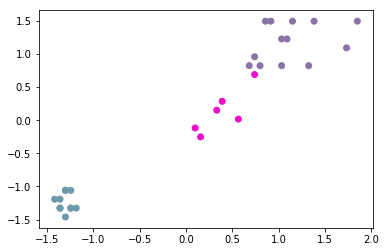

In [10]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap = ListedColormap(generateColors(100)))#zero is purple

### Lets fit a logistic regression to the data and see if we can classify

In [51]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
#You must instantiate your logistic regression classifier here, similar to above
classifier = LogisticRegression(solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
# Predicting the Test set results
y_hat = classifier.predict(X_test)

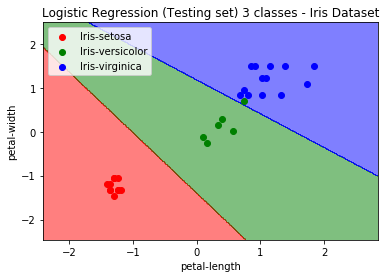

In [53]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = y_label_encoder.classes_[j])
plt.title('Logistic Regression (Testing set) 3 classes - Iris Dataset')
plt.xlabel('petal-length')
plt.ylabel('petal-width')
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import accuracy_score
print('Our accuracy is: {}%'.format(accuracy_score(y_test, y_hat)*100))

Our accuracy is: 96.66666666666667%


### Try with random forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
#Try with Trees that have different depth and number of trees
#You must instantiate your randomforest classifier here, similar to above
classifier = RandomForestClassifier(max_depth=10, n_estimators=15)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
# Predicting the Test set results
y_hat = classifier.predict(X_test)

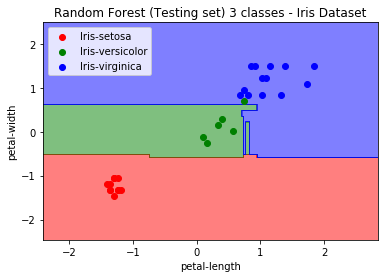

In [85]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = y_label_encoder.classes_[j])
plt.title('Random Forest (Testing set) 3 classes - Iris Dataset')
plt.xlabel('petal-length')
plt.ylabel('petal-width')
plt.legend()
plt.show()

### Why do you think that a random forest with 1 tree and a depth of 1 gives us this?

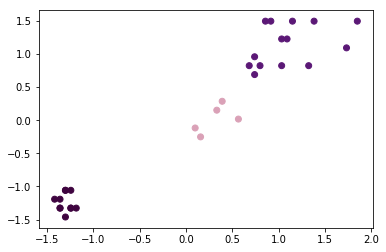

In [86]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_hat, cmap = ListedColormap(generateColors(100)))#zero is purple

### We can check the accuracy score

In [87]:
from sklearn.metrics import accuracy_score
print('Our accuracy is: {}%'.format(accuracy_score(y_test, y_hat)*100))

Our accuracy is: 96.66666666666667%


In [96]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [97]:
y_hat = classifier.predict(X_test)

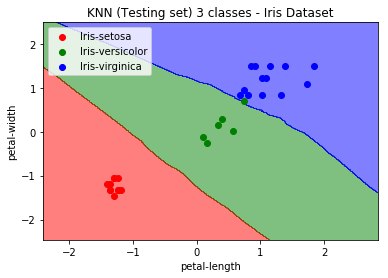

In [98]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = y_label_encoder.classes_[j])
plt.title('KNN (Testing set) 3 classes - Iris Dataset')
plt.xlabel('petal-length')
plt.ylabel('petal-width')
plt.legend()
plt.show()

In [99]:
from sklearn.metrics import accuracy_score
print('Our accuracy is: {}%'.format(accuracy_score(y_test, y_hat)*100))

Our accuracy is: 96.66666666666667%


# If you have gotten this far... Try using SVM from sklearn... Google is your friend 

In [11]:
# Fitting K-NN to the Training set
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

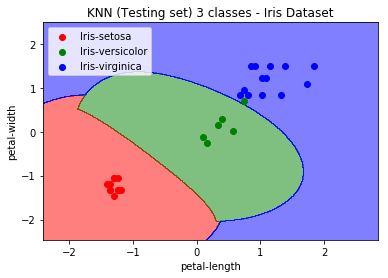

In [12]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = y_label_encoder.classes_[j])
plt.title('KNN (Testing set) 3 classes - Iris Dataset')
plt.xlabel('petal-length')
plt.ylabel('petal-width')
plt.legend()
plt.show()

# One last cool example: the XOR problem!

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
xor = pd.DataFrame({'X1':[0.,0.,1.,1.], 'X2':[0.,1.,0.,1.], 'y':[0.,1.,1.,0.]})
xor

,X1,X2,y
0,0.0,0.0,0.0
1,0.0,1.0,1.0
2,1.0,0.0,1.0
3,1.0,1.0,0.0


In [109]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(xor.iloc[:,:2], xor.iloc[:,2])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

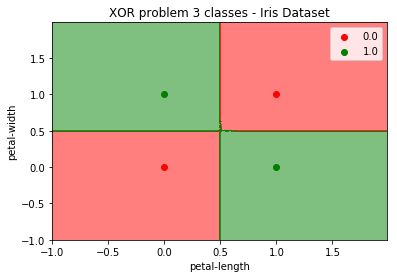

In [110]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = xor.iloc[:,:2].values, xor.iloc[:,2].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('XOR problem 3 classes - Iris Dataset')
plt.xlabel('petal-length')
plt.ylabel('petal-width')
plt.legend()
plt.show()

In [ ]:
classifier.predict(xor.iloc[:,:2])